In [1]:
import numpy as np
import pandas as pd
from math import erf, sqrt
import matplotlib.pyplot as plt
from iism_lab3 import *
%matplotlib inline

In [2]:
def poisson_distribution_function(x, l):
    return np.sum([l ** k / np.math.factorial(k) * np.exp(-l) 
                   for k in range(int(x))])


def poisson_probability_density_function(x, l):
    return l ** x / np.math.factorial(x) * np.exp(-l)

In [3]:
psi1 = poisson_psi()
res1 = np.array([next(psi1) for _ in range(2000)])

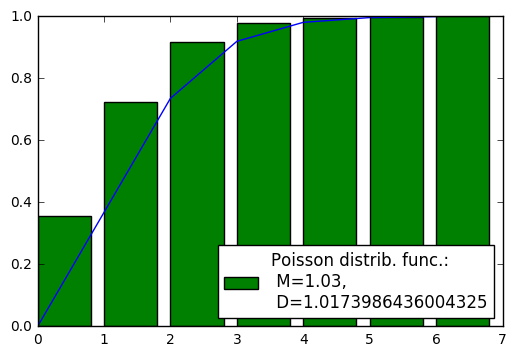

In [4]:
draw_empirical_distribution_func(res1, 
                                 func=poisson_distribution_function, 
                                 ax=plt.gca(),
                                 params={'l': 1},
                                 label='Poisson distrib. func.:\n M={},\n D={}'.format(
                                     M(res1),
                                     D(res1)),
                                 loc=4
                                 )

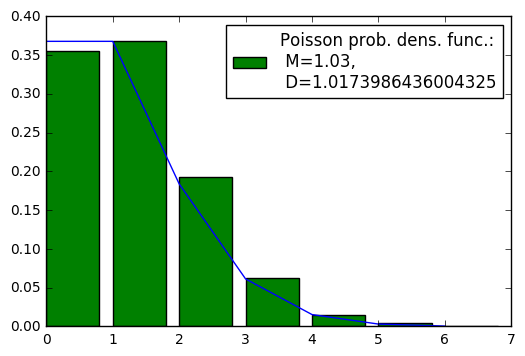

In [5]:
draw_empirical_histogram(res1, 
                         xs=[0] + list(np.unique(res1)),
                         func=poisson_probability_density_function, 
                         ax=plt.gca(),
                         params={'l': 1},
                         label='Poisson prob. dens. func.:\n M={},\n D={}'.format(
                             M(res1),
                             D(res1)),
                         loc=1
                         )

In [6]:
psi2 = normal_psi(12)
res2 = pd.Series([next(psi2) for _ in range(2000)])

In [7]:
def normal_distribution_function(x, M, D):
    return (1. + erf((x - M) / sqrt(2. * D))) / 2.


def normal_probability_density_function(x, M, D):
    return 1 / sqrt(2 * D * np.pi) * np.exp(- (x - M) ** 2 / (2 * D))

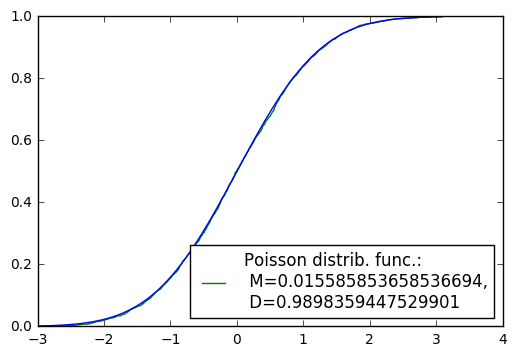

In [8]:
draw_empirical_distribution_func(res2, 
                                 func=normal_distribution_function, 
                                 ax=plt.gca(),
                                 type='plot',
                                 params={'M': 0, 'D': 1},
                                 label='Poisson distrib. func.:\n M={},\n D={}'.format(
                                     M(res2),
                                     D(res2)),
                                 loc=4
                                 )

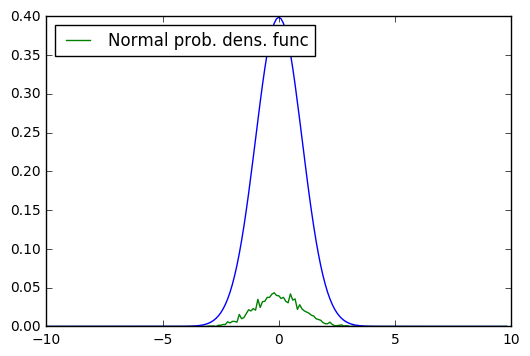

In [9]:
draw_empirical_histogram(res2, 
                         xs=[i for i in np.arange(-10, 10, 0.1)],
                         func=normal_probability_density_function, 
                         ax=plt.gca(),
                         type='plot',
                         params={'M': 0, 'D': 1},
                         label='Normal prob. dens. func',
                         loc=2
                         )

In [10]:
psi3 = exponential_psi()
res3 = pd.Series([next(psi3) for _ in range(2000)])

In [11]:
def exponential_distribution_function(x, l):
    return 1 - np.exp(-l * x)


def exponential_probability_density_function(x, l):
    return l * np.exp(-l * x)

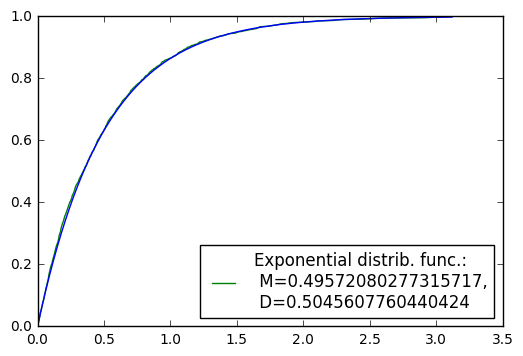

In [12]:
draw_empirical_distribution_func(res3, 
                                 func=exponential_distribution_function, 
                                 ax=plt.gca(),
                                 type='plot',
                                 params={'l': 2},
                                 label='Exponential distrib. func.:\n M={},\n D={}'.format(
                                     M(res3),
                                     D(res3)),
                                 loc=4
                                 )

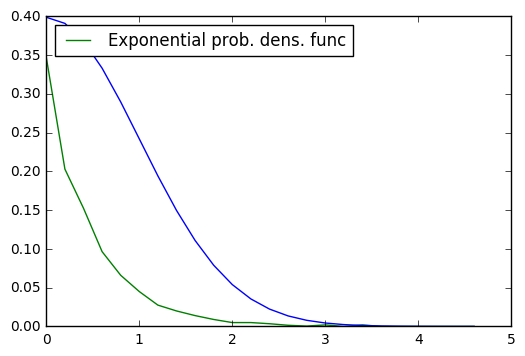

In [13]:
draw_empirical_histogram(res3, 
                         xs=[i for i in np.arange(0, 5, 0.2)],
                         func=normal_probability_density_function, 
                         ax=plt.gca(),
                         type='plot',
                         params={'M': 0, 'D': 1},
                         label='Exponential prob. dens. func',
                         loc=2
                         )

In [14]:
print("Критерий согласия Пирсона")
print("Poisson: ", pearson_test(res1, [i for i in range(min(res1), max(res1) + 1)], eps=0.037, 
                              func=poisson_distribution_function,
                              params={'l': 1}))
print("Normal: ", pearson_test(res2, 
                               [i for i in np.arange(min(res2), max(res2), 0.2)], 
                               eps=0.037,
                               func=normal_distribution_function,
                               params={'M': 0, 'D': 1}))
print("Exponential: ", pearson_test(res3, 
                                    [i for i in np.arange(min(res2), max(res2), 0.2)], 
                                    eps=0.037,
                                    func=exponential_distribution_function,
                                    params={'l': 2}))

Критерий согласия Пирсона
Poisson:  True
Normal:  True
Exponential:  True


In [15]:
print("Критерий согласия Колмогорова")
print("Poisson: ", kolmogorov_test(res1, 
                                   eps=0.037, 
                                   func=poisson_distribution_function,
                                   params={'l': 1}))
print("Normal: ", kolmogorov_test(res2,
                                  eps=0.037,
                                  func=normal_distribution_function,
                                  params={'M': 0, 'D': 1}))
print("Exponential: ", kolmogorov_test(res3,
                                       eps=0.037,
                                       func=exponential_distribution_function,
                                       params={'l': 2}))

Критерий согласия Колмогорова
Poisson:  True
Normal:  True
Exponential:  True


In [2]:
psi4 = polynomial_psi([0.2, 0.3, 0.5])
res4 = pd.Series([next(psi4) for _ in range(2000)])